# Beautiful Soup tutorial для самых любознательных

В данной статейке будут рассмотрены основные принципы работы с библиотекой для анализа документов HTML и XML- `Beautiful Soup`, которая вкупе с другой библиотекой `requests`, позволяющией получать вышеназванный HTML, представляет из себя довольно мощный интсрумент для скрапинга сайтов.

Так и прежде, чем перейдём к основному веселью: скраппингу данных с одного небезызвестного видеохостинга, самую малость поговорим о теории.

`Beautiful Soup` преобразует HTML разметку в дерево синтаксического разбора. И делает это даже, если *разметка неправильная*. Кроме того, неоспоримым плюсом является так же *простота* и даже *естественность* навигации, что несомненно помогает сэкономить Вам время. Но вот что точно этому не способствует, так это создаваемая нагрузка на CPU. Да, и, откровенно говоря, существует и более быстрые Python парсеры.

*Всё, хватит разглагольствований, ближе к коду, так сказать, к живому делу!*

### И начнём мы, как обычно, с импорта необходимых библиотек:

К стандартным `pandas`, `numpy` и уже упомянутым BeautifulSoup версии 4.9 (`bs4`) да `requests` добавим ещё и `cvs`, для того, чтобы потом была возможность *записать* полученные данные в .csv файл.

In [ ]:
import csv

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

Если эти библиотеки у Вас ещё не установлены, пропишите следующие команды:

`python -m pip install requests`

`pip install beautifulsoup4`

### Затем создадим пару важных констант, которые очень пригодятся нам в дальнейшем:

Если с `HOST` и `URL`, я полагаю, вопросов не возникает, то зачем же нужна константа `HEADERS`?

In [ ]:
HOST = 'https://www.pornhub.com'
URL = 'https://www.pornhub.com/video'

 
HEADERS = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'
}

Дело в том, что, подтягивая что- либо с сайта, мы посылаем ему уйму запросов и некоторые сайты могут такие запросы попросту банить. Поэтому нашей задачей будет сделать запросы как можно более правдоподобными. Одним из способов это достижения правдоподобности как раз является использования `HEADERS`.

Очевидно, что указанные значения `'user-agent'` и `'accept'` могут Вам не подойти.
Поэтому в качестве небольшого упражнения, предлагаю найти и вписать свои `HEADERS` по соответствующему ключу ниже.
Сделать это проще всего будет, перейдя по ссылке: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending 

In [ ]:
HEADERS = {
    'user-agent': ''
    'accept': ''
}

### А что мы будем делать дальше?

    1)Сначала, нам будет необходимо подтянуть HTML страницы с меню.

    2)Затем достать из него нужную информацию, а именно: ссылки на видео.

    3)Потом, перейдя по каждой ссылке, мы уже непосредственно будем получать информацию описывающую каждый из видеороликов. 

Не стоит волноваться, поскольку все шаги мы рассмотрим по отдельности, логически разбив их по функциям.

И всё это для того, чтобы в конце *Вы сами смогли написать подобный парсер*, адоптировав его под собственные нужды

### Получаем html представление страницы:

Тут нам понадобится функция `requests.get()`, в которую мы будем передавать `URL`, свои `HEADERS` а так же такой аргумент как `params`. Благодаря ему мы сможем обеспечить более удобную навигацию.

В частности, благодаря `params` можно более удобным способом итерироваться по страницам. Что мы в дальнейшем и будем делать.

А пока *прошу обратить внимание на следующий пример*:

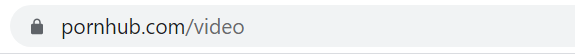
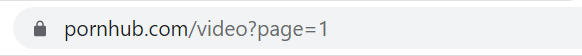

Несмотря на то, что содержимое строк поиска разное, контент открываемых страниц будет одинаковым: первая страница видеоподборок на сайте. А `page=1` и есть тот самый параметр.

Теперь давайте взглянем на код:

In [ ]:
def get_page_html(url, params=''):
    r = requests.get(url, headers=HEADERS, params=params)
    return r


page_html = get_page_html(URL)
print(page_html)

`<Response [200]>` означает, что всё работает как надо, в противном случае вместо `числа, начинающегося на 2` в скобках будет стоять код соответствующей ошибки.

Возможно, некоторые из вас сейчас задались вопросом, а где же сама html- разметка которую мы должны подтягивать?

Всё на месте, и чтобы убедиться в этом, можете воспользоваться свойством `.text` полученного объекта

In [ ]:
# page_html.text

### Вычленяем необходимые нам элементы из общей "портянки":

Те, кто осмелился вывести текстовое представление, могли заметить, что выглядит оно пока что довольно непонятно и слегка карательно, но это не беда, для успешной работы с полученной разметкой `Beautiful Soup` и нужен.

И тут наверное, уже в пору остановиться на рассмотрении конкретного видео. Так что приготовьтесь:
**сейчас будет чернуха**

-Готовы?

-Тогда поехали.


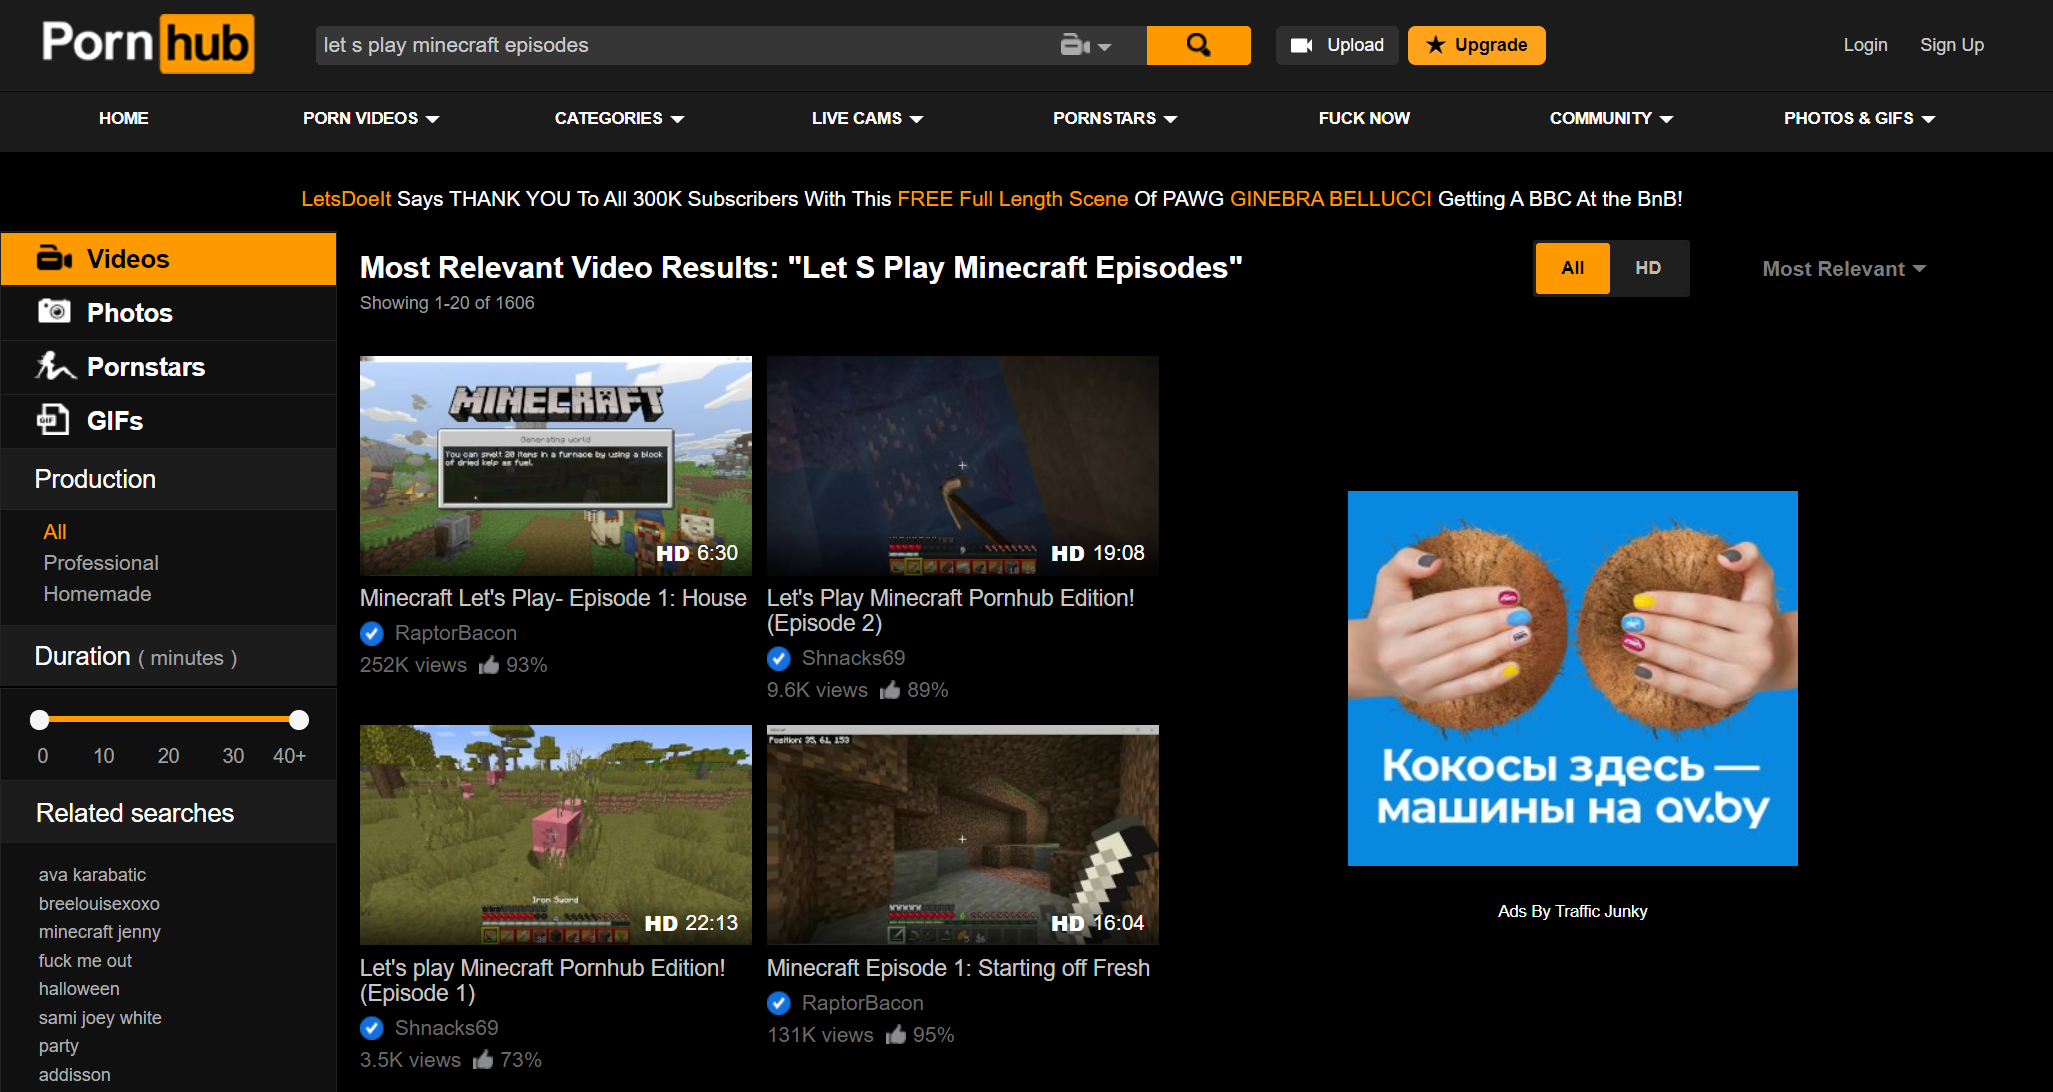

Не, ну серьёзно, каким же надо быть извращенцем, чтобы выкладывать сюда **такое?!**

А впрочем нас интересует не это. Данный сайт, как и любые другие состоит из множества свистелок- мерцалок. Наша же задача в данный момент- *достать* лишь то, что будет полезно, а конкретно: *ссылки на сами видео*, чтобы можно было в дальнейшем с ними работать. Как это сделать?

На самом деле, сделать это совсем не сложно, достаточно просто руководствоваться логикой: где элемент, там, вероятнее, всего и ссылка. Т.е. для начала предлагаю найти в разметке элементы, отвечающие конкретно за представление видосов. *Если этого не сделать, или сделать неправильно, то мы рискуем получить совершенно не ту информацию*.

Проще всего будет открыть при помощи комбинации `ctrl` + `shift` + `I` инструменты разработчика и во вкладке `elements` искать заветный элемент. Напоминаю, что представление такой же разметки уже имеется у нас локально.

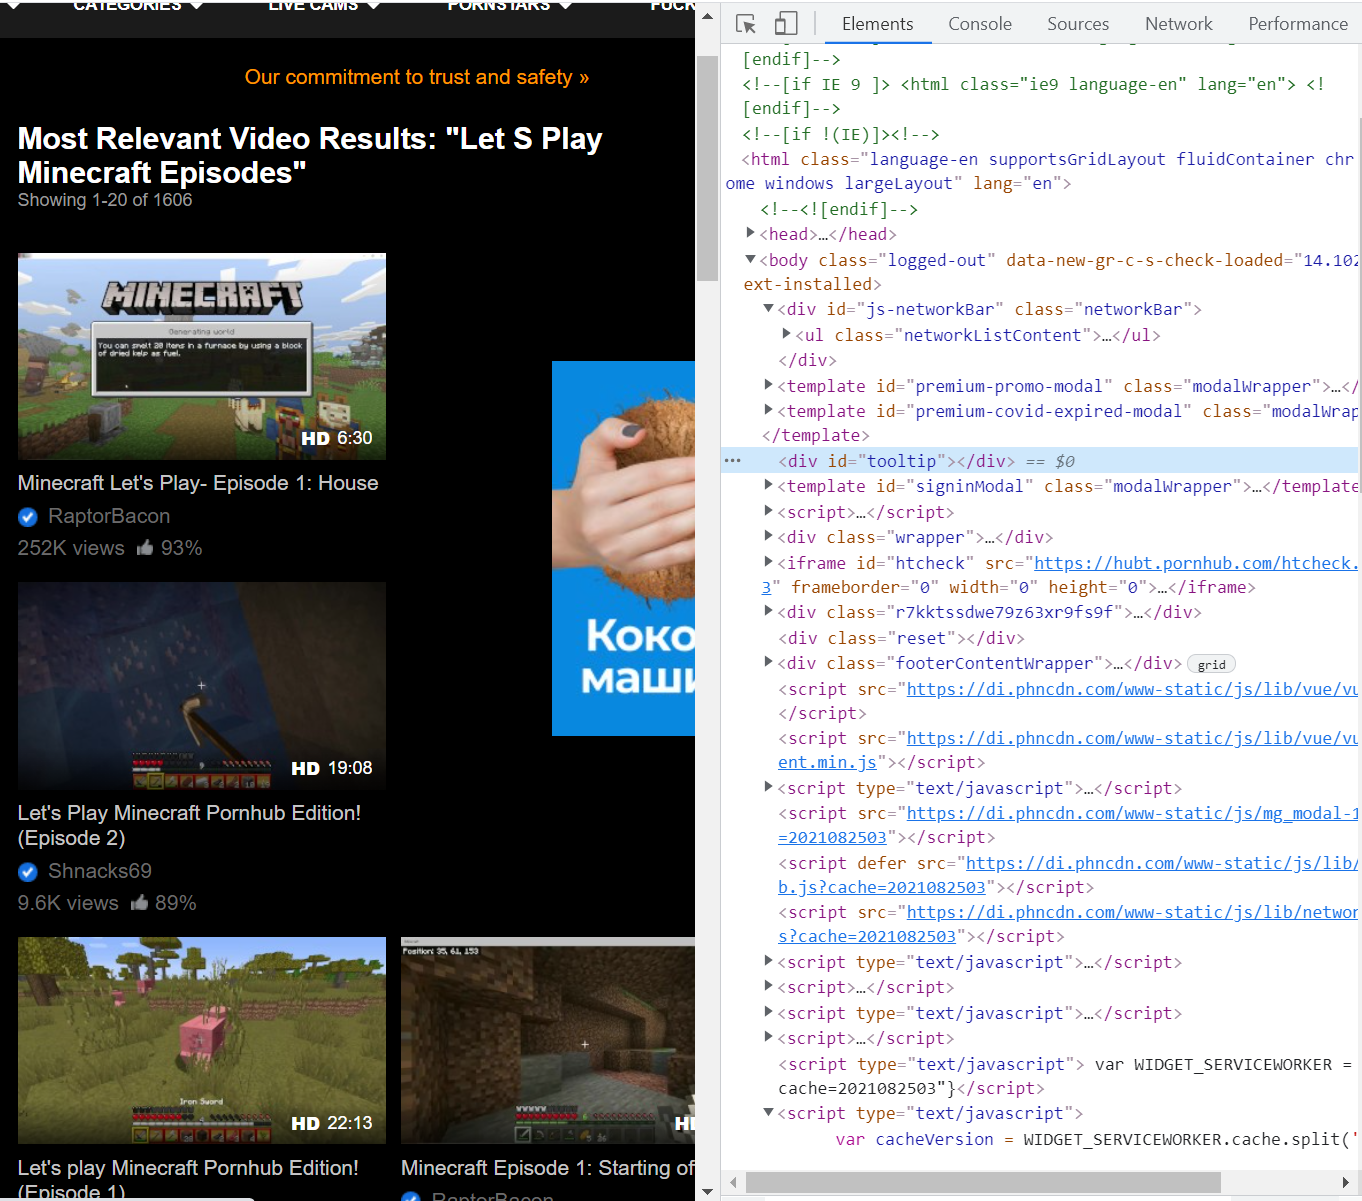

На исследуемом сайте все элементы ролика представляются в виде списка с общим HTML тегом: `li` и CSS классом: `pcVideoListItem js-pop videoblock videoBox`.
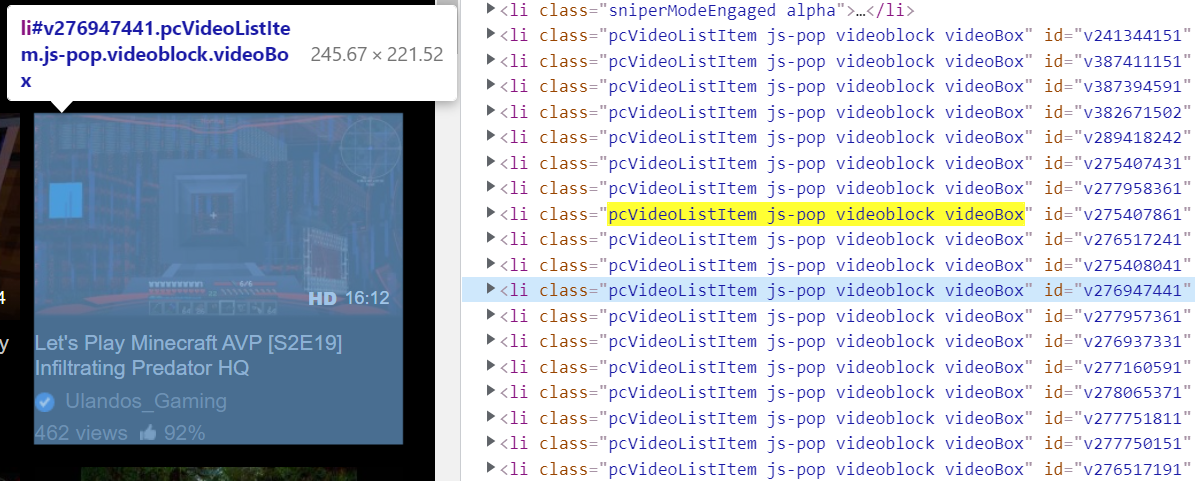

Непосредственно по этим занчениям и будем производить наш поиск. При помощи Beautiful Soup и функции `find_all`, которой пророчено найти все необходимые элементы.

In [ ]:
def get_page_content(page_html):
    page_soup = BeautifulSoup(page_html.text, 'html.parser')
    page_items = page_soup.find_all('li', class_='pcVideoListItem js-pop videoblock videoBox')
    return page_items

page_content = get_page_content(page_html)

*Небольшая ремарка*: Прежде, чем мы можем использовать BS функции, сперва надо инициализировать дерево синтаксического разбора.

### Достаём ссылки:

Дальнейшей нашей задачей будет достать из каждой обёртки роликов ссылку. И здесь алгоритм схожий:

Смотрим вложенные в найденный теги. Как видно вложенных классов у нас тут немало. Можно было бы конечно сразу попытаться вытащить ссылку `href`, но есть вероятность вытащить не ту: может выпасть ссыль на рекламу или плейлист, а нам надо на видео. Опытным путём было установлено, что такая ссылка находится всегда под тегом `span` в классе `title`. Всё, дело за малым из- под дочернего тега `a` забираем ссылку на видео при помощи функции `get()`, указав параметром `href` для того чтобы сформировать массив ссылок.

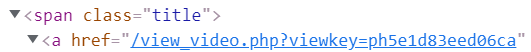

In [ ]:
def get_video_links(page_content):
    links = []
    for item in page_content:
        links.append(
            item.find('span', class_='title').find('a').get('href')
        )
    return links

video_links = get_video_links(page_content)

Обратите внимание, что вместо `find_all()` мы используем `find()`, в силу того, что хотим найти *конкретную ссылку* на каждое видео, а не *все ссылки*.

Можете убедиться в правильности нашего пути, выведя часть ссылок. Так же, но уже на свой страх и риск, можете попробовать перейти по парочке из них.


*Подсказка*: `ctrl` + `shift` + `N` позволяет быстро открыть вкладку в инкогнито

In [ ]:
list(map(lambda x: HOST + x, video_links))[0:5]

Замечательно, мы получили ссылки на видео для реквестов, теперь надо получить html представления каждой из вкладок с видео, причём сделать с нескольких страниц, а не только с первой, как мы это делали раньше. 

Тут нам на помощь и придут `params`. Аргумент `pages` отвечает же за то, сколько страниц мы собираемся парсить.

Можете поиграться с ним, но, чтобы не ждать слишком долго, лучше много страниц не парсить

In [ ]:
def get_video_htmls(url, video_links, pages=1, params=''):
    video_htmls = []
    for page in range(pages + 1):
        for link in video_links:
            video_htmls.append(get_page_html(url+link, params={'page': page}))
    return video_htmls

video_htmls = get_video_htmls(HOST, video_links)

### Ну и квинтэссенцией данного туториала будет сам скраппинг информации о роликах:

Чтобы удержать Ваше внимание, предлагаю, сменить тему ролика. В этот раз давайте возьмём какое- нибудь специфическое видео, где люди занимаются тем, что большинству даже не доступно. Чем- то особенным, уникальным и способным вызвать ярчайшие эмоции, но лишь у ценителей...

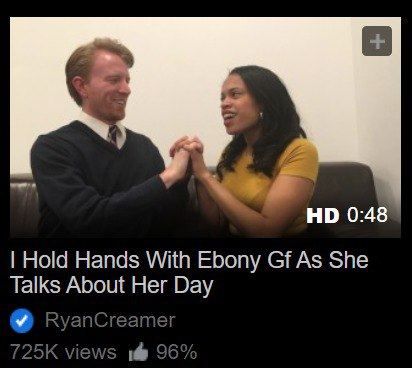

И знаете что, он действительно на протяжении всего видео держит свою девушку за руку и слушает о том, как прошёл её день. Мой герой.

Итак, нас ждёт всё тот же *поиск элементов по тегу*, нас интересует всё что отемечено на данном скриншоте + ещё имена актёров, которые могут как присутствовать, так и отсутствовать*

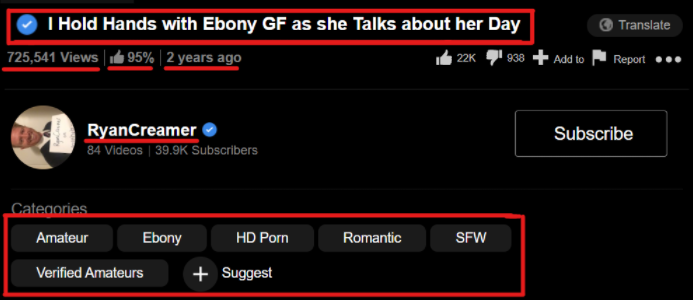

Как же это всё достать- да точно так же как мы и доставали ссылки.

Для большего упрощения можете навести на элемент, с которого хотели бы что- либо потенциально соскрейпить, нажать правую кнопку мыши, а затем: `просмотреть код`:

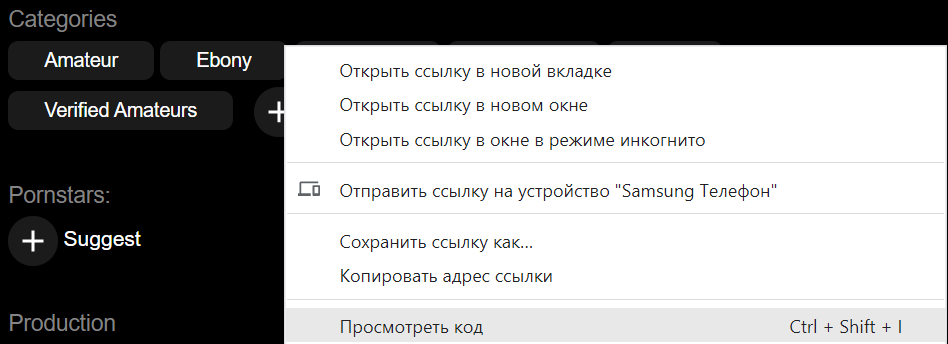

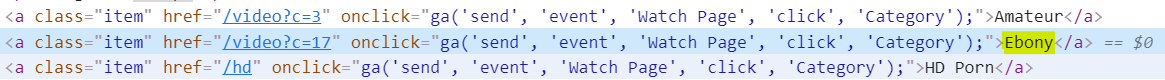

In [ ]:
def get_video_content(video_html):
    video_soup = BeautifulSoup(video_html.text, 'html.parser')
    try:
        params = {
            'chanel name': video_soup.find('div', class_='userInfo').find('a').get_text(strip=True),
            'title': video_soup.find('span', class_="inlineFree").get_text(strip=True),
            'categories': [x.get_text(strip=True) for x in video_soup
                            .find('div', class_='categoriesWrapper')
                            .find_all('a', class_='item')],
            'views': video_soup.find('div', class_="ratingInfo").find('span', class_="count").get_text(strip=True),
            'rating': video_soup.find('span', class_="percent").get_text(strip=True),
            'actors': [x.get_text(strip=True) for x in video_soup
                       .find('div', class_='pornstarsWrapper js-pornstarsWrapper')
                       .find_all('a', class_='pstar-list-btn js-mxp')]
        }
    except AttributeError:
         params = None
    return params

Из использованного, но ещё не рассмотренного, стоит упомянуть лишь функцию `get_text()`, которая позволяет получит затеганный текст, а `strip=True` означает, что мы его обрезаем, удаляя лишнее.

### Финальный штрих: сохраняем то, что мы теперь умеем скрапить в csvшник

In [ ]:
def save_doc(video_htmls, path):
    with open(path, 'w', newline='', encoding="utf-8") as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(get_video_content(video_htmls[0]).keys())
        for html in video_htmls:
            try:
                writer.writerow(get_video_content(html).values())
            except AttributeError:
                ('corrupted row skipped')
                
                
save_doc(video_htmls, 'data.csv')

### А теперь считаем, чтобы убедиться, что всё работает

Наслаждайтесь.

In [ ]:
df = pd.read_csv('data.csv', sep=';')

In [ ]:
df.head()

Хотя данный датасет и соджержит желанную информацию, к использовнию он всё ещё не пригоден: кое- что надо почистить, объединить, преобразовать, но это уже совсем другая история...

_______________________________________________________________________________________________________________________________



\* По-хорошему, такие случаи следует обкладывать `try- except` блоками, это мы и сделаем.
Ибо, вообще говоря, сайты– очень настабильная штука, на их работу могут влиять такие вещи как: скорость хостига, его мощность, положение звёздных тел на небе, цвет наряда королевы Великобритании и другие факторы. Поэтому, чтобы результаты серьёзной работы не пошли прахом всегда рекомендуется отлавливать ошибки.
_______________________________________________________________________________________________________________________________

Выполнено 26.08.2021г. Петровичем Фёдором. Все права защищены, кроме тех, что я сам нарушл)0))